In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('NSE Data/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [4]:
df1=df.interpolate(limit_direction="both")


In [5]:
df2=df1[['Close']]

In [6]:
forecast=25
df2['prediction']=df2['Close'].shift(-forecast)
df2.head()

C:\Users\harish\AppData\Local\Temp/ipykernel_3908/350617452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prediction']=df2['Close'].shift(-forecast)


,Close,prediction
0,7791.299805,7298.200195
1,7784.649902,7215.700195
2,7741.000000,6976.350098
3,7568.299805,6980.950195
4,7601.350098,7162.950195


In [7]:
df2.tail()

,Close,prediction
1476,17086.250000,NaN
1477,17233.250000,NaN
1478,17213.599609,NaN
1479,17203.949219,NaN
1480,17354.050781,NaN


In [8]:
X=np.array(df2.drop(['prediction'],1))
X=X[:-forecast]
print(X)

[[ 7791.299805]
 [ 7784.649902]
 [ 7741.      ]
 ...
 [17415.050781]
 [17536.25    ]
 [17026.449219]]


C:\Users\harish\AppData\Local\Temp/ipykernel_3908/2475577436.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(df2.drop(['prediction'],1))


In [9]:
Y=np.array(df2['prediction'])
Y=Y[:-forecast]
print(Y)

[ 7298.200195  7215.700195  6976.350098 ... 17213.599609 17203.949219
 17354.050781]


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [11]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [12]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [13]:
svr_rbf=SVR(kernel='rbf',C=1000,gamma=0.0001)
svr_rbf.fit(X_train,Y_train)

SVR(C=1000, gamma=0.0001)

In [14]:
svr_confidence=svr_rbf.score(X_test,Y_test)
print(svr_confidence)

0.8924533998813564


In [15]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
lr_confidence=lr.score(X_test,Y_test)
print(lr_confidence)

0.92189487016422


In [17]:
regr = RandomForestRegressor(n_estimators=300,random_state=0,criterion = "absolute_error")
regr.fit(X_train,Y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=300,
                      random_state=0)

In [18]:
regr_confidence=regr.score(X_test,Y_test)
print(regr_confidence)

0.9296617451379978


In [19]:
x_forecast=np.array(df2.drop(['prediction'],1))[-forecast:]
lr_prediction=lr.predict(x_forecast)
regr_prediction=regr.predict(x_forecast)
print(lr_prediction)
print(regr_prediction)

C:\Users\harish\AppData\Local\Temp/ipykernel_3908/3512807292.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_forecast=np.array(df2.drop(['prediction'],1))[-forecast:]


[17205.7138402  17135.21894867 17318.25773586 17552.16128053
 17347.94911603 17064.52555648 17328.0212315  17620.01533777
 17666.94511625 17661.41629606 17518.88132378 17475.68802365
 17372.5612212  17399.46386532 17137.21173712 16767.54947908
 16923.63502326 17107.56900888 17224.29698111 17155.69562821
 17237.8981519  17384.3681032  17364.78856705 17355.17297417
 17504.73330394]
[17770.34596329 17803.72774064 17738.25554029 17882.34559909
 17738.25554029 17799.98526667 17738.25554029 17814.68855444
 18030.62354148 18031.13520815 18304.09800121 18082.92093758
 17793.65038414 18042.44942065 17803.72774064 17758.22144538
 17658.18391919 17798.02443334 17770.34596329 17790.84076793
 17770.34596329 17913.88827486 17760.75831382 17760.75831382
 18304.3777342 ]


In [20]:
svm_prediction=svr_rbf.predict(x_forecast)
print(svm_prediction)

[14218.55636553 13794.89159619 13983.43694704 17285.62074504
 13790.86012048 13558.99729472 13900.18316125 16624.7175352
 16994.43243807 16930.59433196 17452.55232084 16682.14508091
 13849.46625416 14247.64391675 13801.2209444  16432.5223708
 13604.00800083 13723.80463528 14340.26285059 13876.15030608
 14397.86072193 13978.40968733 13802.23758719 13781.71233285
 17328.53451638]


In [21]:
actualdata=pd.read_csv('NSE Data/NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')
df3=actualdata['Close'].shift(+2)

In [22]:
df3.head()

0             NaN
1             NaN
2    17625.699219
3    17805.250000
4    17925.250000
Name: Close, dtype: float64

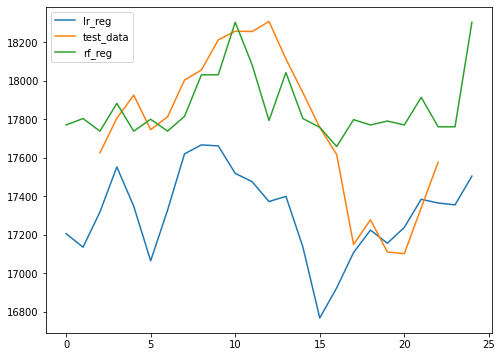

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(lr_prediction,label='lr_reg')
#plt.plot(svm_prediction,label='svr')
plt.plot(df3,label="test_data")
plt.plot(regr_prediction,label='rf_reg' )
plt.legend()
plt.show()